In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
train_categorical_vars = train_df.select_dtypes(include=['object']).drop(columns=['CustomerID'])
train_numerical_vars = train_df.select_dtypes(include=['int64', 'float64']).drop(columns=['Churn'])
test_categorical_vars = test_df.select_dtypes(include=['object']).drop(columns=['CustomerID'])
test_numerical_vars = test_df.select_dtypes(include=['int64', 'float64'])

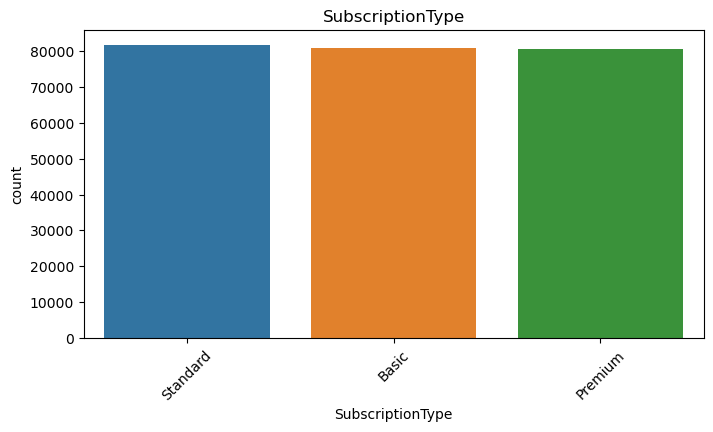

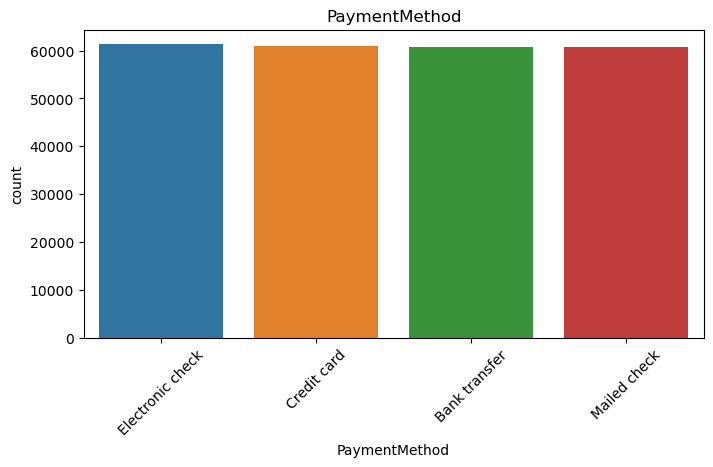

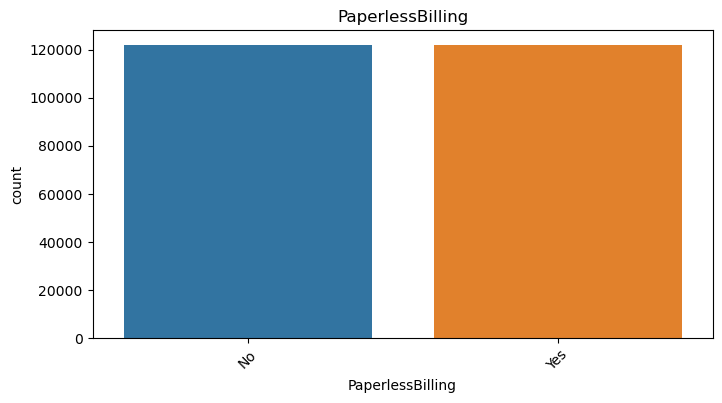

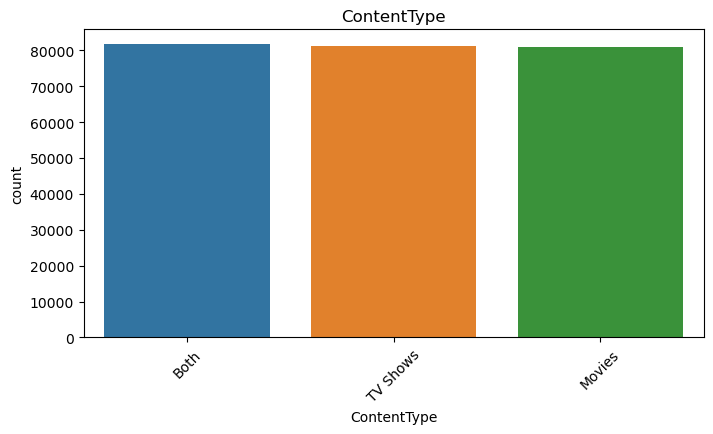

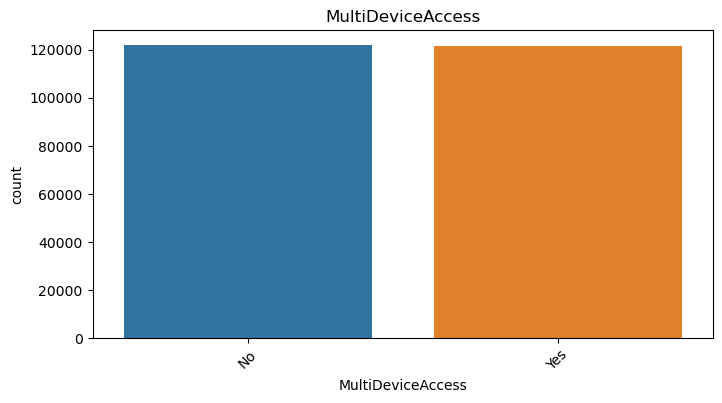

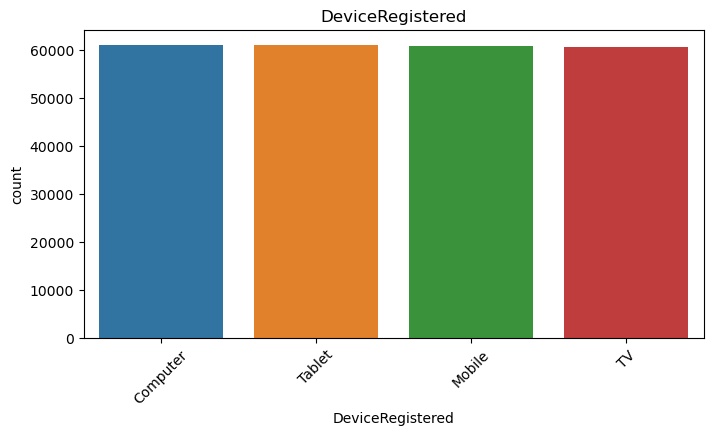

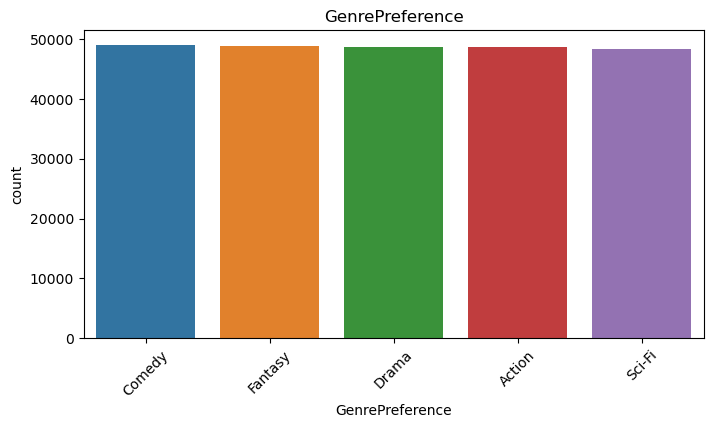

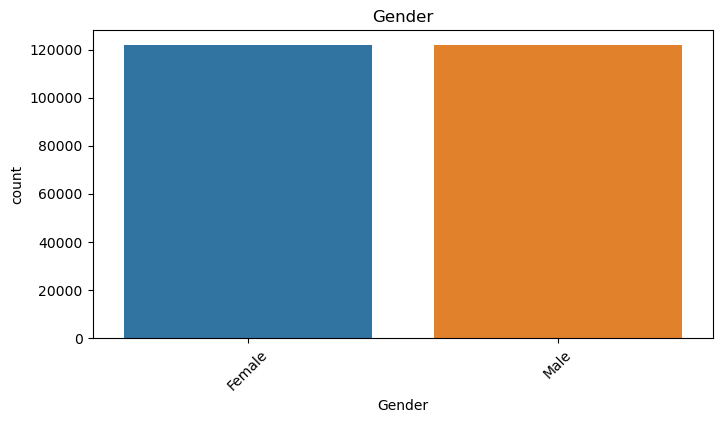

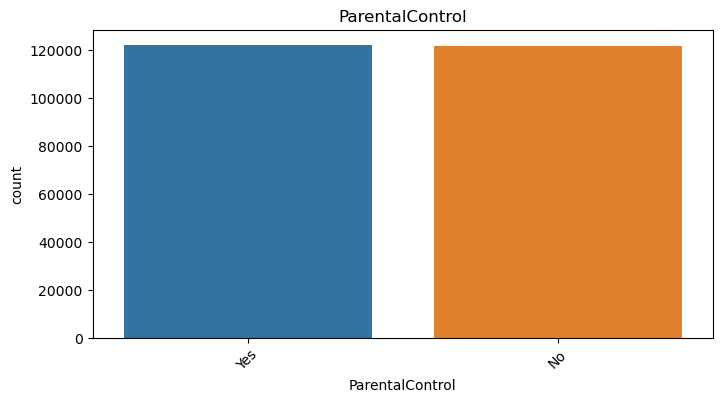

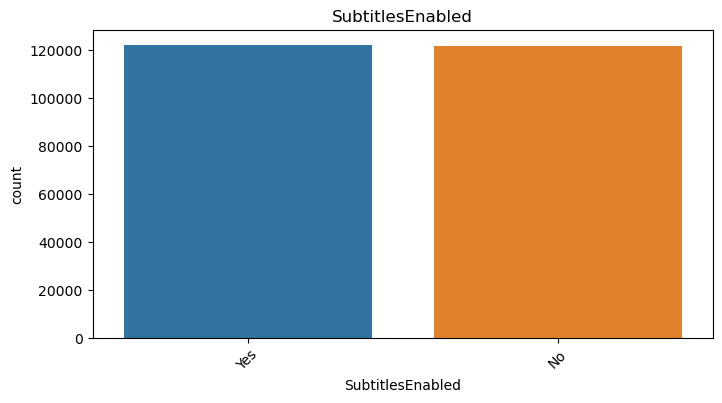

In [8]:
# Visualizations
for col in train_categorical_vars.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index[:20])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

c:\Users\santi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


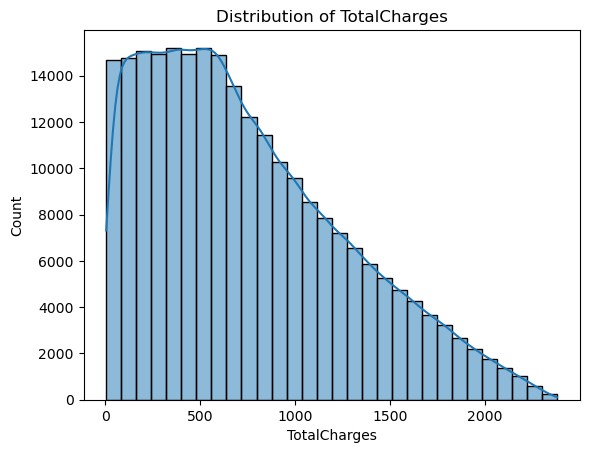

In [9]:
# Checking which measure of central tendency (mean, median or mode) is more appropriate for imputing missing values
sns.histplot(train_df['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of TotalCharges')
plt.show()

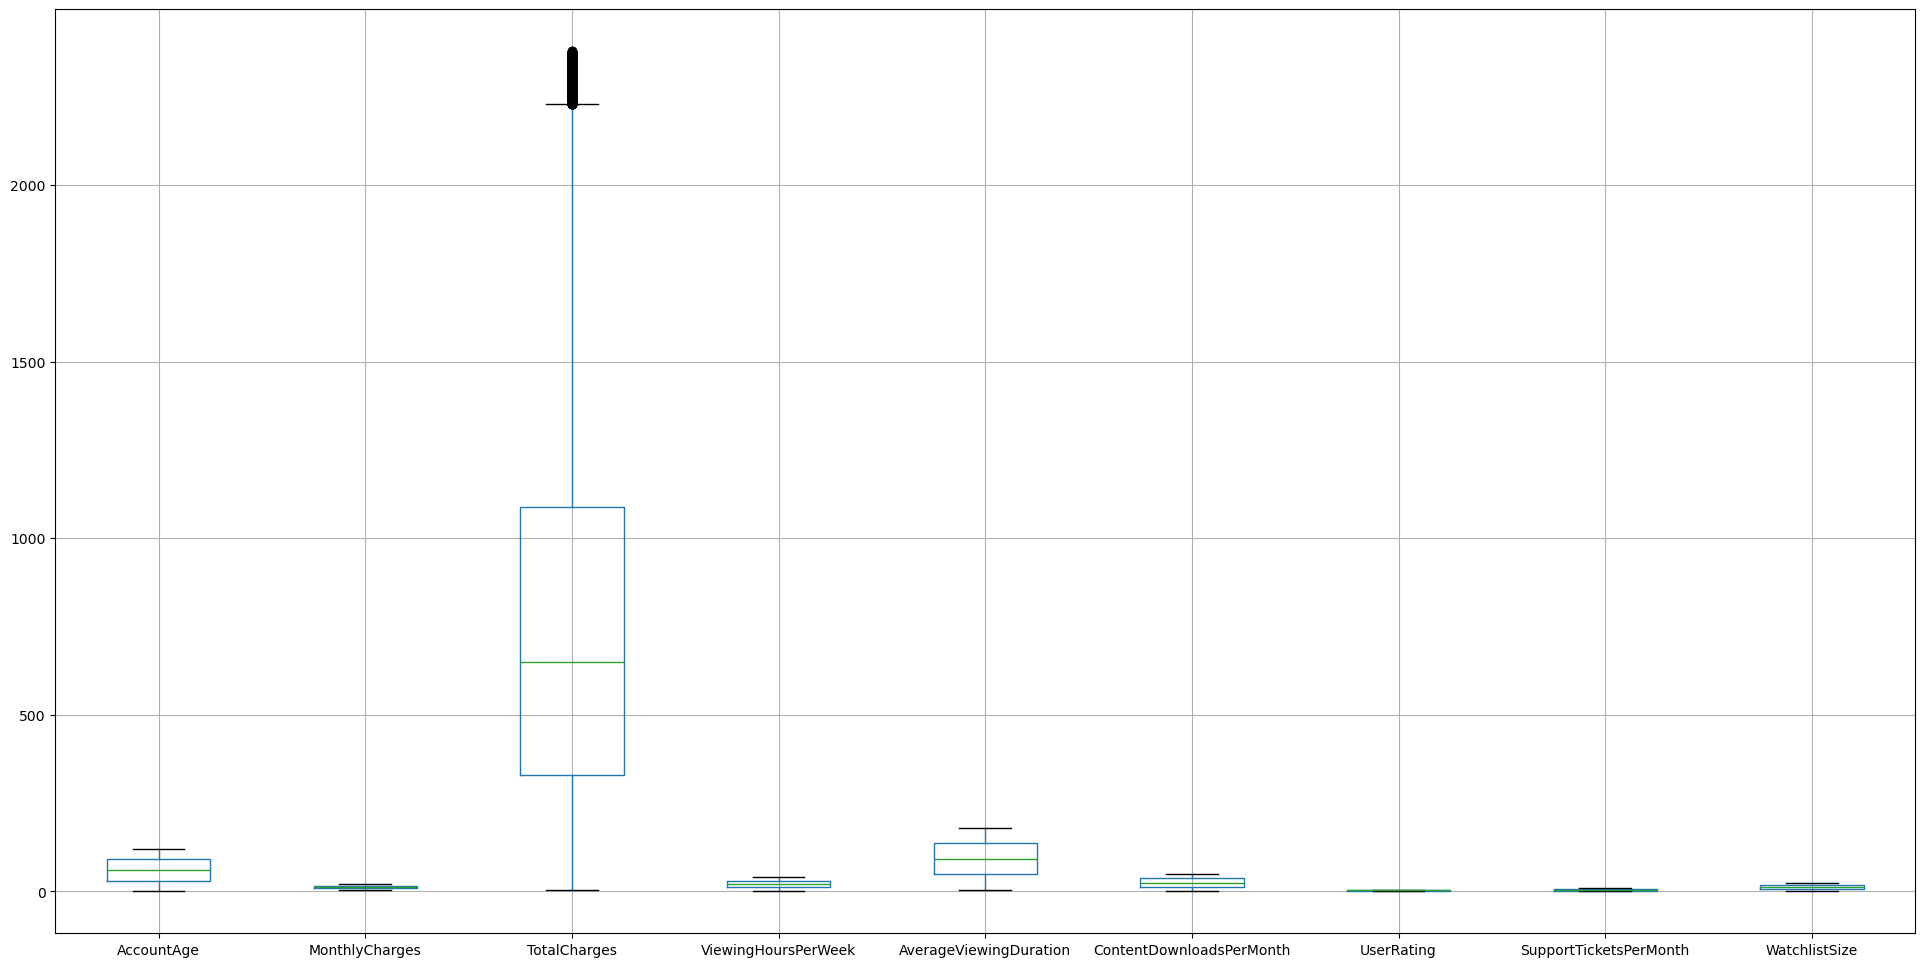

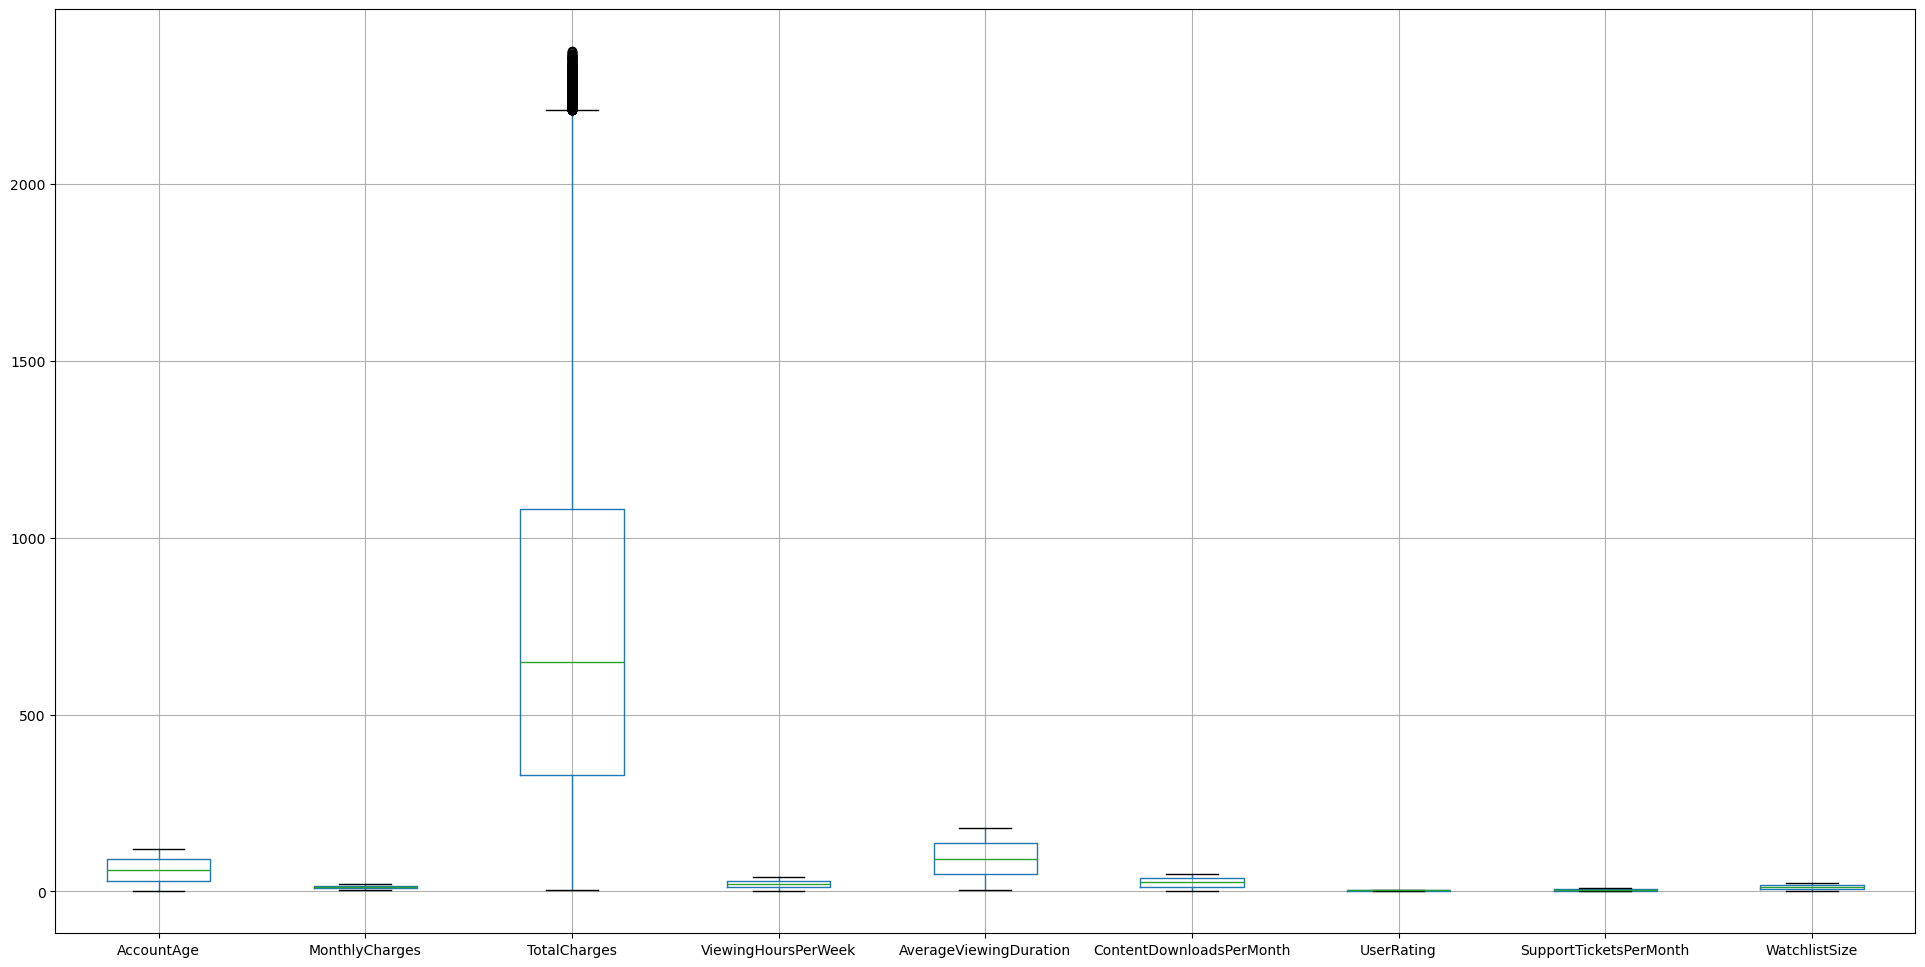

In [10]:
train_numerical_vars.boxplot(figsize=(24, 12))
plt.show()

test_numerical_vars.boxplot(figsize=(24, 12))
plt.show()

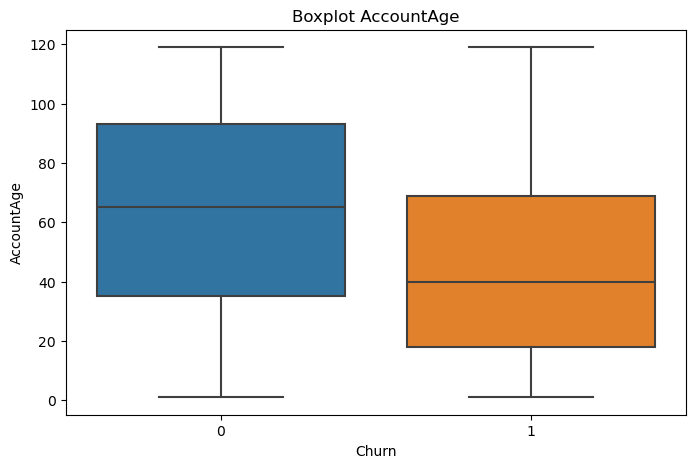

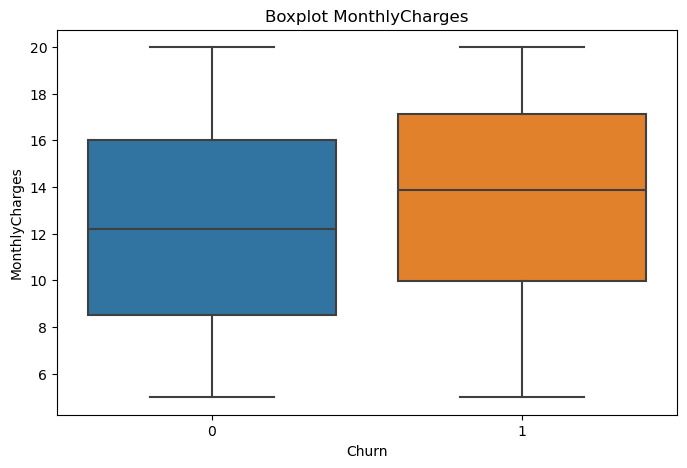

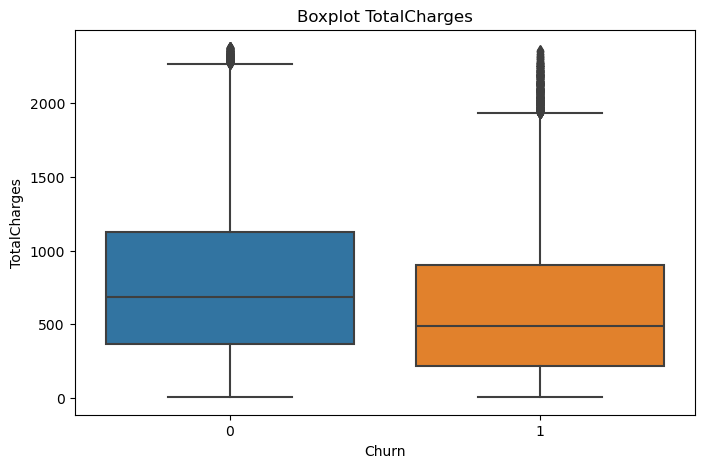

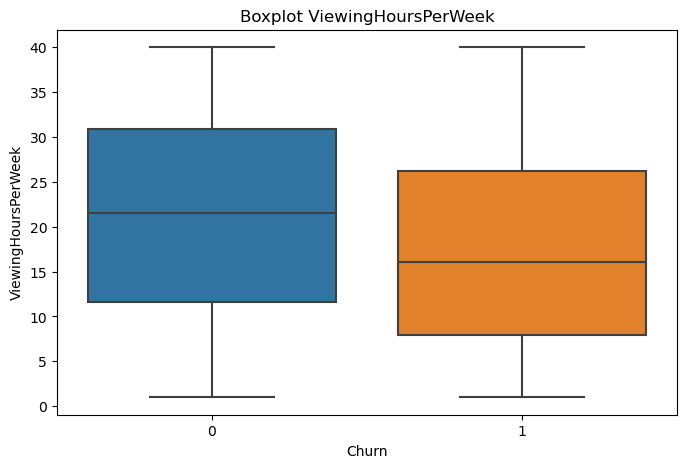

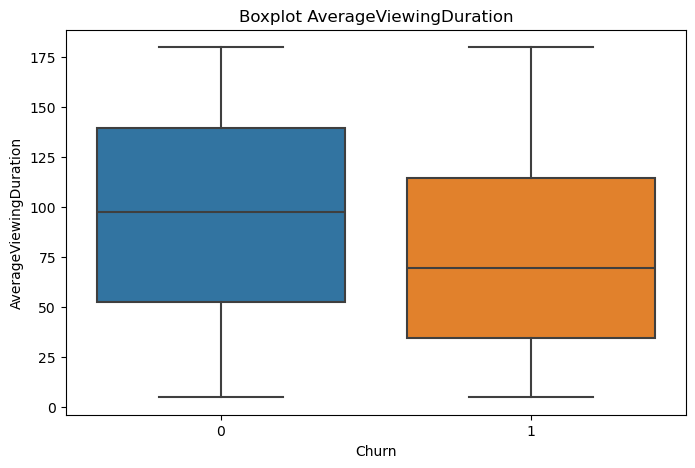

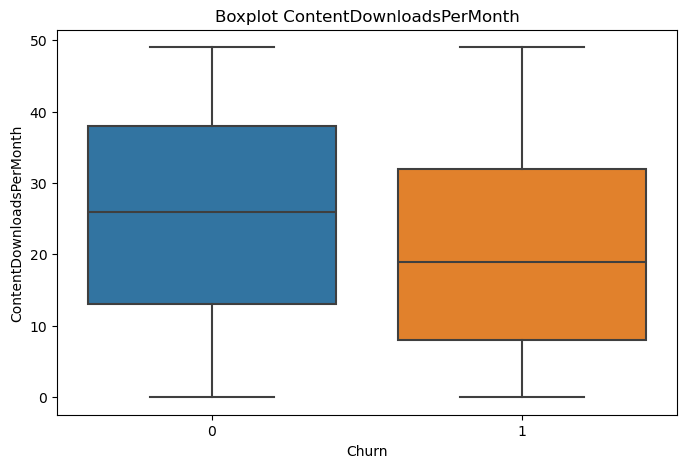

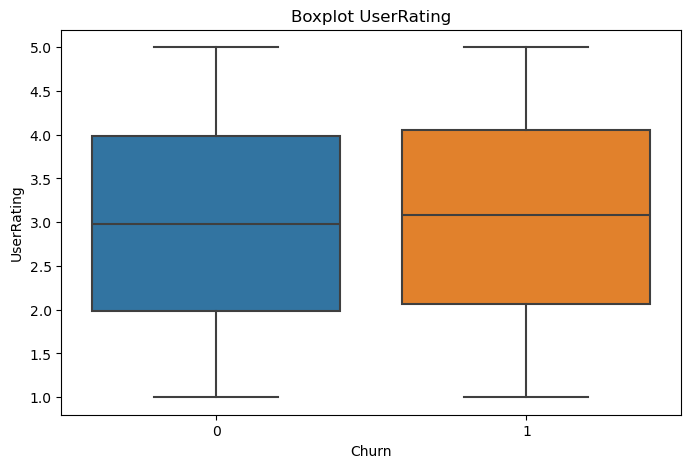

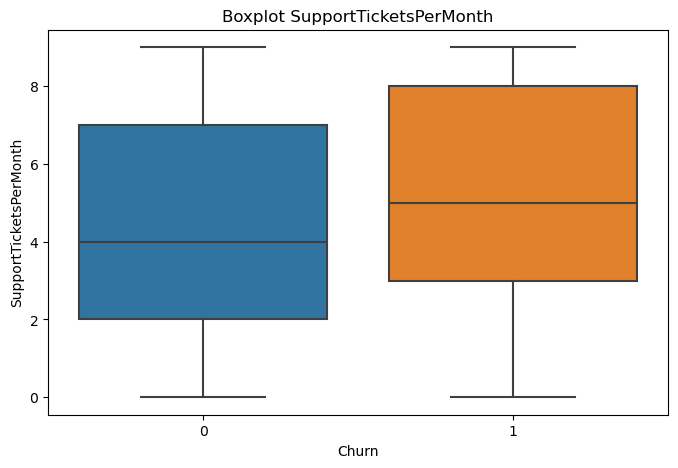

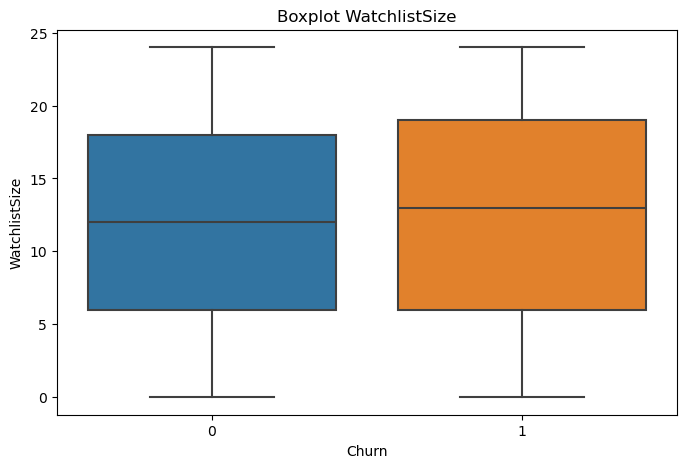

In [11]:
for n in train_numerical_vars.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_df['Churn'], y=train_numerical_vars[n])
    plt.title(f'Boxplot {n}')
    plt.xlabel('Churn')
    plt.ylabel(n)
    plt.show()

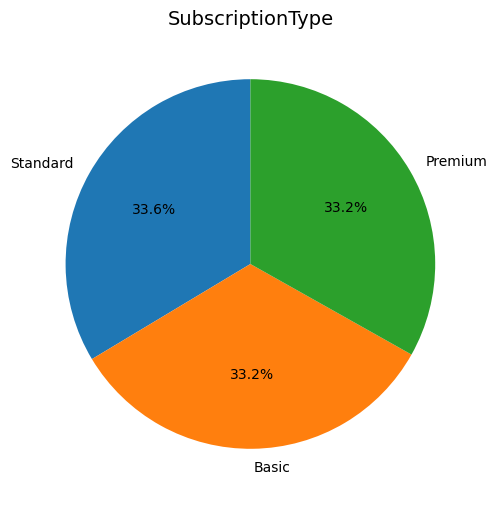

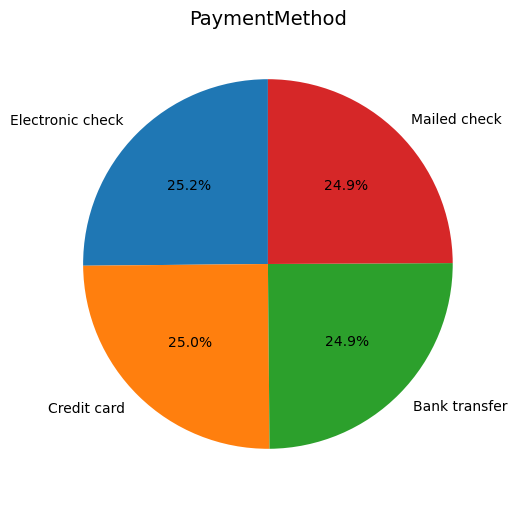

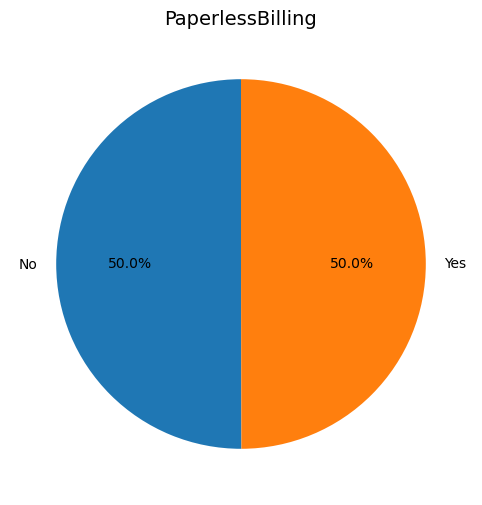

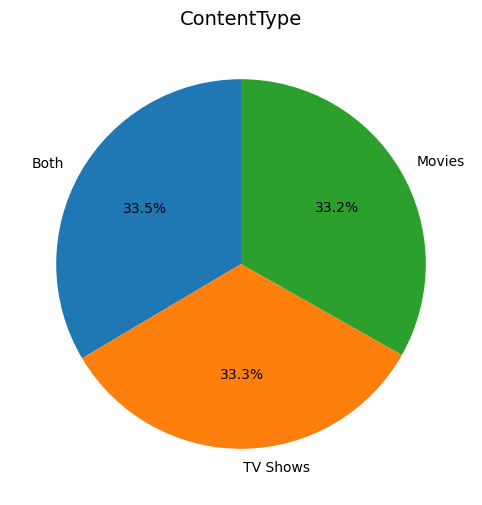

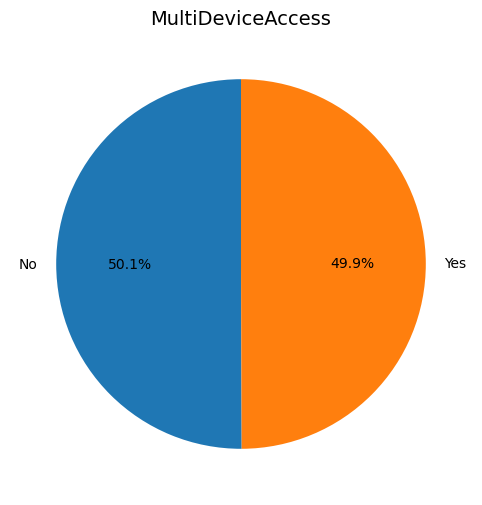

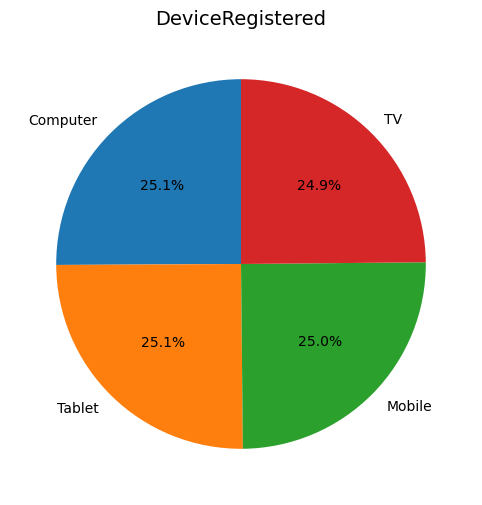

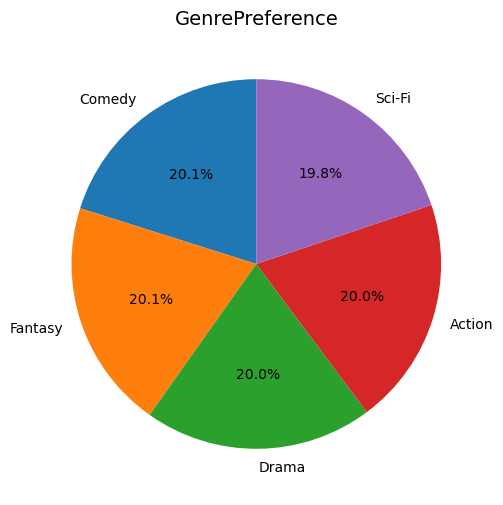

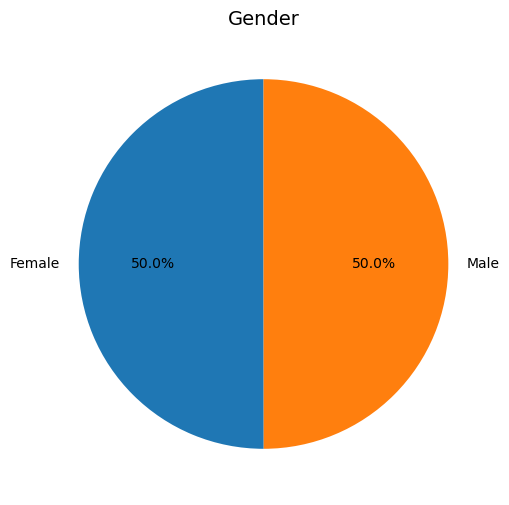

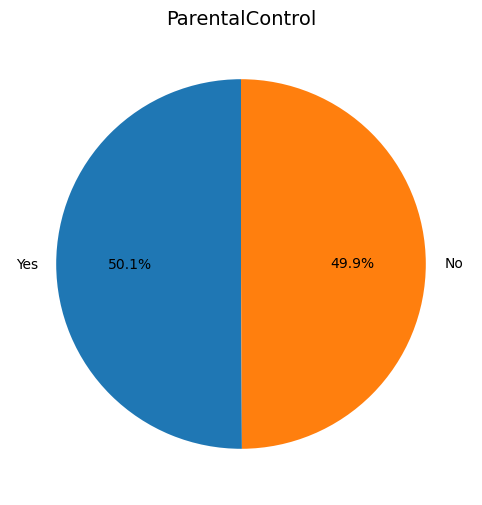

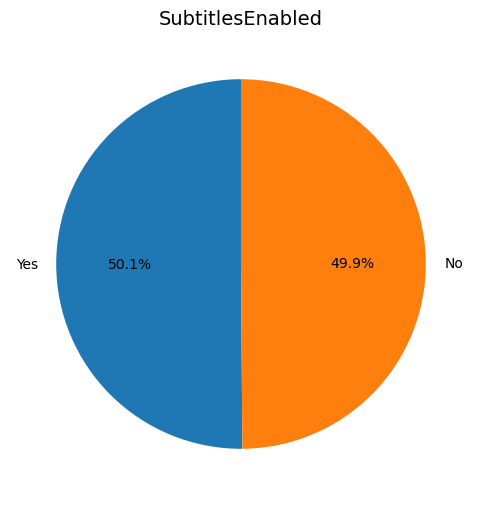

In [12]:
for i in train_categorical_vars.columns:
    plt.figure(figsize = (10, 6))
    plt.pie(train_categorical_vars[i].value_counts(), 
            labels = train_categorical_vars[i].value_counts().index,
            autopct ='%1.1f%%', 
            startangle = 90)
    
    plt.title(f'{i}', fontsize=14)
    plt.show()

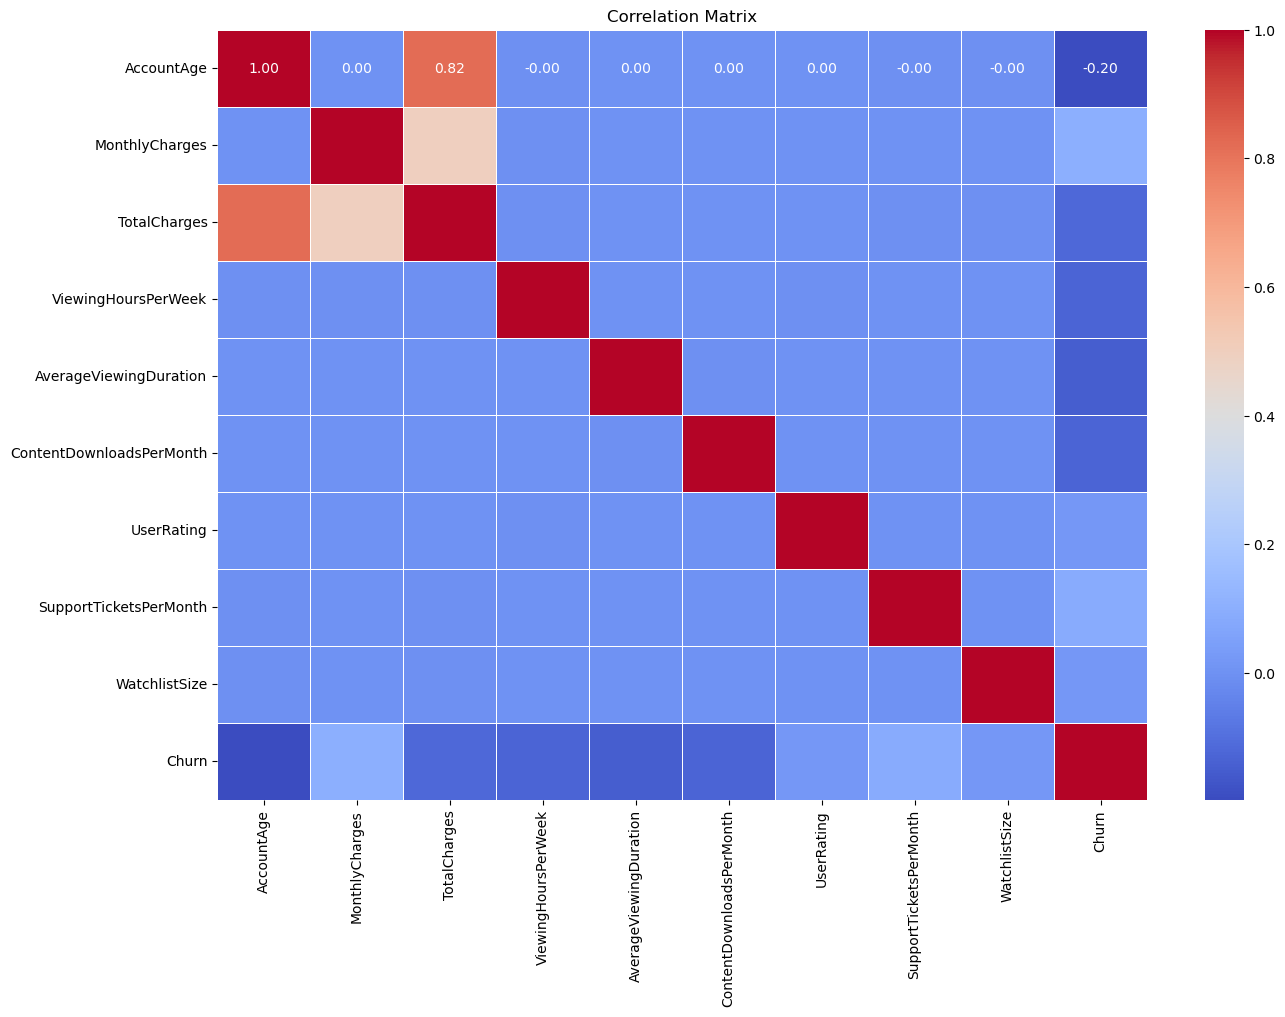

In [13]:
correlation_matrix = train_df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()